In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
x = tf.ones((2, 2))

In [7]:
with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.math.reduce_sum(x)
    z = tf.multiply(y, y)

In [8]:
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [9]:
y

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [10]:
z

<tf.Tensor: shape=(), dtype=float32, numpy=16.0>

In [11]:
# derivative of z with respect to the original input tensor x
dz_dx = tape.gradient(z, x)
dz_dx

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[8., 8.],
       [8., 8.]], dtype=float32)>

In [12]:
# with respect to y:
dz_dy = tape.gradient(z, y)
dz_dy

RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

In [13]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x * x
    z = y * y
    dz_dx = tape.gradient(z, x)
    dy_dx = tape.gradient(y, x)
    del tape

In [14]:
print(dz_dx)
print(dy_dx)

tf.Tensor(108.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)


In [13]:
# Fit a Linear Model 
class Model(object):
    def __init__(self):
        # init the weights to 5 and the bias to 0
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()

In [14]:
def loss(predicted_y, target_y):
    return tf.math.reduce_mean(tf.square(predicted_y - target_y))

In [15]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

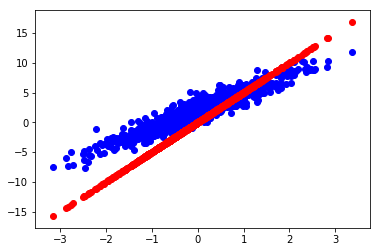

Current Loss 8.643584


In [16]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current Loss %1.6f' % loss(model(inputs), outputs).numpy())

In [17]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        # calculate loss
        current_loss = loss(model(inputs), outputs)
        
        # calculate gradients: dLoss/dW and dLoss/db
        dW, db = tape.gradient(current_loss, [model.W, model.b])
        
        # Update W and b Using Gradient Descent: W = W - learning_rate * dW
        model.W.assign_sub(learning_rate * dW)
        model.b.assign_sub(learning_rate * db)                

Epoch  0: W=5.00 b=0.00, loss=8.64358
Epoch  1: W=4.61 b=0.39, loss=5.94792
Epoch  2: W=4.30 b=0.70, loss=4.19725
Epoch  3: W=4.05 b=0.94, loss=3.06001
Epoch  4: W=3.84 b=1.14, loss=2.32109
Epoch  5: W=3.67 b=1.30, loss=1.84084
Epoch  6: W=3.54 b=1.43, loss=1.52864
Epoch  7: W=3.43 b=1.53, loss=1.32564
Epoch  8: W=3.34 b=1.61, loss=1.19360
Epoch  9: W=3.26 b=1.67, loss=1.10771


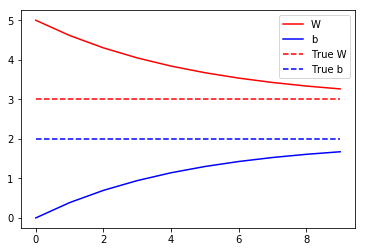

In [18]:
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:    
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
         (epoch, Ws[-1], bs[-1], current_loss))

    
# Let's plot it all
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()
